In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [7]:
#reading the image
img = plt.imread('pennies.jpg')

In [8]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

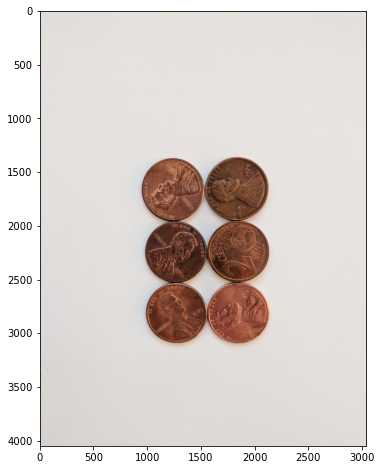

In [9]:
display(img)

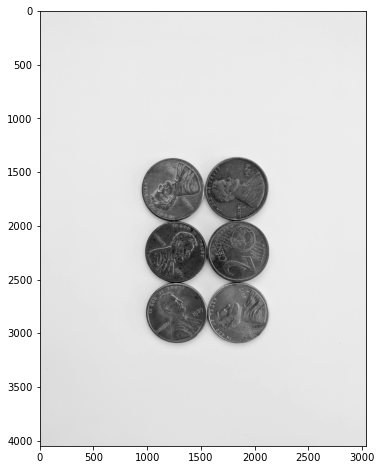

In [10]:
# Displaying the imgae in gray scale
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
display(gray_img,cmap='gray')

In [11]:
# Applying blur to gray img
blur_img = cv2.medianBlur(gray_img,37)

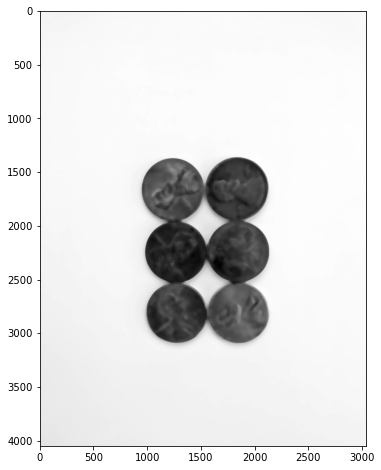

In [12]:
display(blur_img,cmap='gray')

In [13]:
# Applying thresholding which can also remove some noise present in the image
ret,thresh_img = cv2.threshold(blur_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

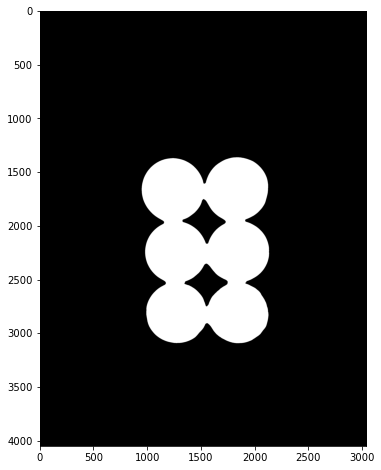

In [14]:
display(thresh_img,cmap='gray')

### Determing the background using dilation operation

In [15]:
kernel = np.ones(shape=(3,3),dtype=np.uint8)

In [16]:
background = cv2.dilate(thresh_img,kernel,iterations=3)

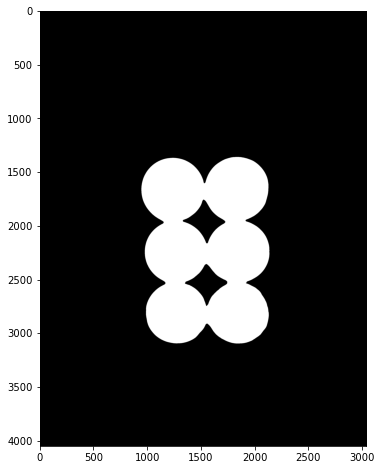

In [17]:
display(background,cmap='gray')

### Applying distance transform to determine the foreground of the image

In [18]:
dist_transform = cv2.distanceTransform(thresh_img,cv2.DIST_L2,5)

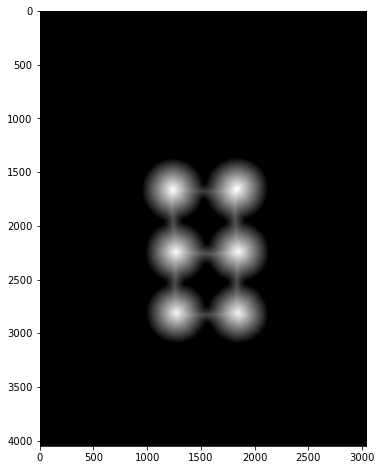

In [19]:
display(dist_transform,cmap='gray')

In [22]:
# Applying thresholding again to determine the actual foreground points
ret,foreground = cv2.threshold(dist_transform,0.75*dist_transform.max(),255,0)

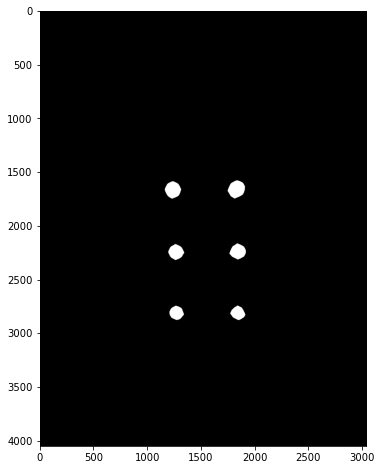

In [23]:
display(foreground,cmap='gray')

In [24]:
foreground = np.uint8(foreground)

### Determining the unknown region between the background and foreground

In [25]:
unk_region = cv2.subtract(background,foreground)

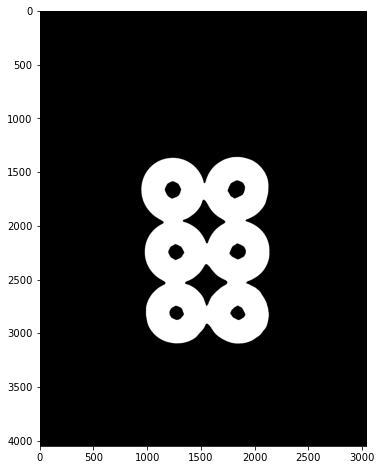

In [26]:
display(unk_region,cmap='gray')

### Labeling markers to determine all three regions of the image

In [27]:
ret, markers = cv2.connectedComponents(foreground)

In [28]:
markers = markers+1

In [29]:
markers[unk_region==255] = 0

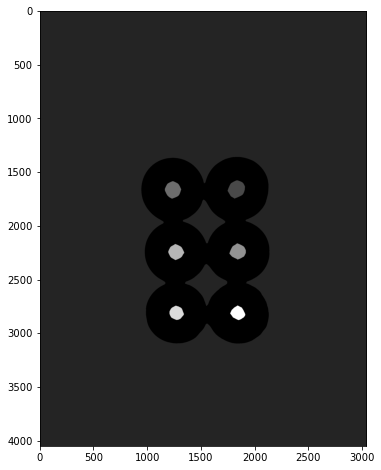

In [30]:
display(markers,cmap='gray')

### Using Watershed algorithm 

In [31]:
markers = cv2.watershed(img,markers)

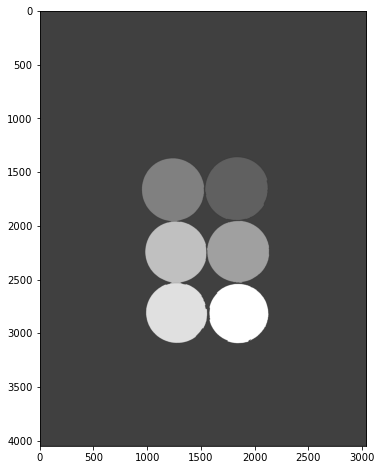

In [32]:
display(markers,cmap='gray')

### Detecting contours after applying watershed algo 

In [33]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [34]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255, 0, 0), 10)

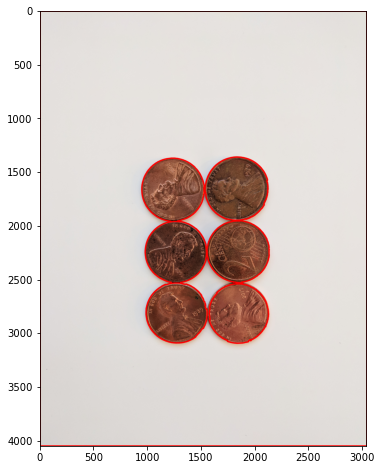

In [35]:
display(img)

### THANKS...